<a href="https://colab.research.google.com/github/dejanbatanjac/Yolov5/blob/main/Yolo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [2]:
! pip install -U opencv-python pillow pyyaml tqdm  

     |████████████████████████████████| 49.5MB 62kB/s 
     |████████████████████████████████| 2.2MB 48.8MB/s 
     |████████████████████████████████| 276kB 37.4MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=3da5fbb246650c0ffa3bb8373a0bbf4f6cdf7788dea1169e08ecc94cb67d6e03
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully unins

# Loading the model

In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).fuse().eval()  # yolov5s.pt
model = model.autoshape()  # for autoshaping of PIL/cv2/np inputs and NMS

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     19904  models.common.BottleneckCSP             [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    161152  models.common.BottleneckCSP             [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    641792  models.common.BottleneckCSP             [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                   

Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients


Fusing layers... 
Adding autoShape... 


# Download image from web and draw the annotations

In [56]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Kust_till_kust_banan.JPG/1200px-Kust_till_kust_banan.JPG -O image.jpg
# Images
# img = Image.open('image.jpg')  # PIL image
import cv2
img = cv2.imread(r"image.jpg") #cv2

# Inference
prediction = model(img)  # includes NMS
print(prediction)

--2020-11-01 18:38:29--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Kust_till_kust_banan.JPG/1200px-Kust_till_kust_banan.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445085 (435K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 434.65K  --.-KB/s    in 0.01s   

2020-11-01 18:38:29 (28.9 MB/s) - ‘image.jpg’ saved [445085/445085]

[tensor([[1.64480e+01, 3.24697e+02, 8.78497e+02, 7.60126e+02, 8.37642e-01, 6.00000e+00],
        [7.61095e+02, 4.23908e+02, 8.28596e+02, 4.71562e+02, 2.59206e-01, 0.00000e+00]], grad_fn=<CopySlices>)]


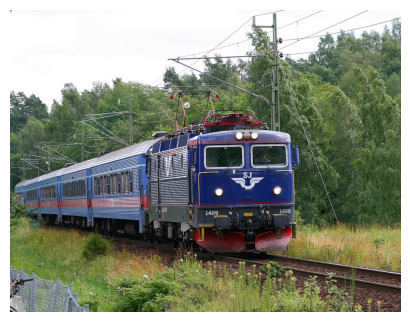

In [62]:
def show_image(path, dpi=100):
    img=cv2.imread(path)
    img=img[:,:,::-1]
    fig = plt.figure(dpi=dpi)
    ax = fig.add_subplot(111)
    ax.imshow(img)
    ax.axis('off');

show_image(r"image.jpg")

In [59]:
prediction[0].shape

torch.Size([2, 6])

In [3]:
# https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml
# number of classes
nc=80

# class names
names= ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']
print(names[0])
# annotations
ann = prediction[0].detach().numpy() #[0][0]
ann, ann[1]

person


(array([[     16.448,       324.7,       878.5,      760.13,     0.83764,           6],
        [     761.09,      423.91,       828.6,      471.56,     0.25921,           0]], dtype=float32),
 array([     761.09,      423.91,       828.6,      471.56,     0.25921,           0], dtype=float32))

(929, 1200, 3)
train
16.447992 878.4965
324.6973 760.12646
person
761.09467 828.5956
423.9078 471.562


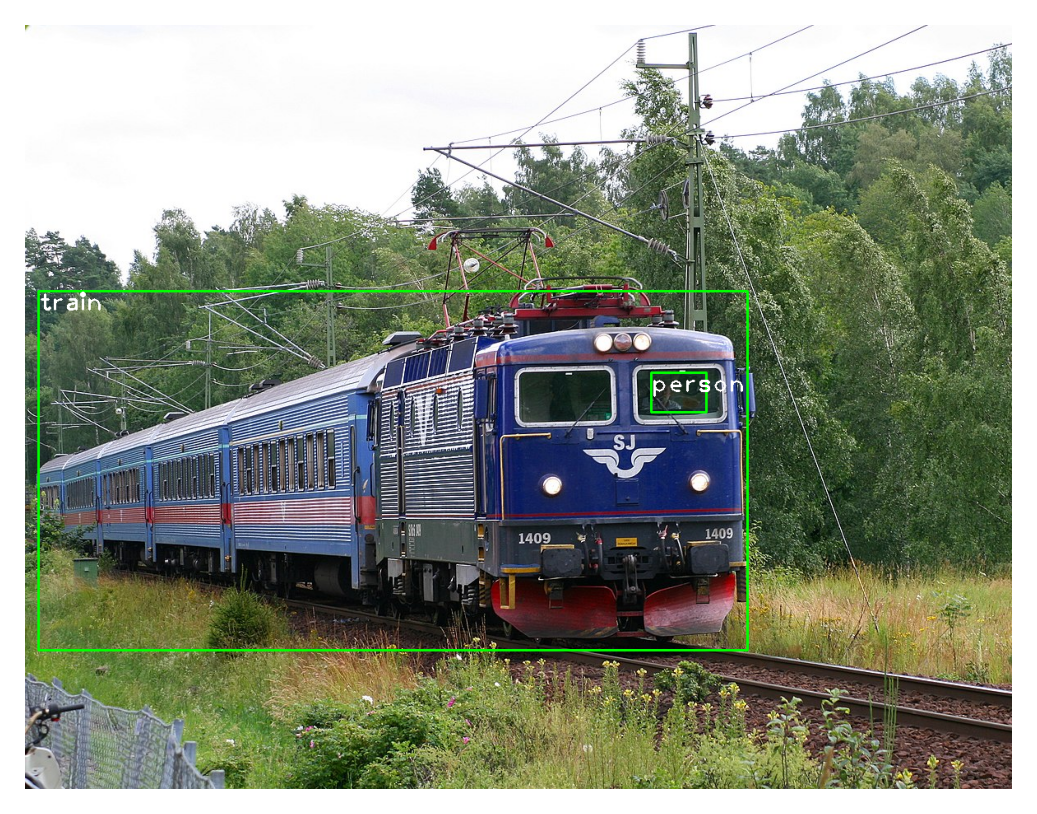

In [6]:
img = cv2.cvtColor(cv2.imread(f'image.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)

for rect in ann:
        
    label = names[int(rect[5])]
    print(label)

    x1, x2 = rect[0] , rect[2]
    print(x1, x2)
    y1, y2 = rect[1] , rect[3]
    print(y1, y2)

    img = cv2.rectangle(
        img,    
        (int(x1), int(y1)),
        (int(x2), int(y2)),
        color=(0, 255, 0),
        thickness=2
        )

    ((label_width, label_height), _) = cv2.getTextSize(
            label,
            fontFace=cv2.FONT_HERSHEY_PLAIN,
            fontScale=2,
            thickness=2
            )

    img = cv2.putText(
        img,
        label,
        org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=2,
        color=(255, 255, 255),
        thickness=2
    )


fig = plt.figure(dpi=253)
ax = fig.add_subplot(111)

ax.imshow(img)
ax.axis('off');

# Create custom dataset in *darknet format* from `cloating.json`

In [4]:
# get cloting.json from google
!gdown --id 1uWdQ2kn25RSQITtBHa9_zayplm27IXNC -O clothing.json

Downloading...
From: https://drive.google.com/uc?id=1uWdQ2kn25RSQITtBHa9_zayplm27IXNC
To: /content/clothing.json
100% 199k/199k [00:00<00:00, 6.44MB/s]


In [5]:
# for working with json
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json

In [6]:
# get all records as array
clothing = []
with open("clothing.json") as f:
    for line in f:
        clothing.append(json.loads(line))

In [7]:
# get just the first record
clothing[0]

{'annotation': [{'imageHeight': 312,
   'imageWidth': 147,
   'label': ['Tops'],
   'notes': '',
   'points': [{'x': 0.02040816326530612, 'y': 0.2532051282051282},
    {'x': 0.9931972789115646, 'y': 0.8108974358974359}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/4bb8fd9d-8d52-46c7-aa2a-9c18af10aed6___Data_xxl-top-4437-jolliy-original-imaekasxahykhd3t.jpeg',
 'extras': None}

In [8]:
# check if there are examples with more than 1 annotation
for c in clothing:
  if len(c['annotation']) > 1:
    display(c)

{'annotation': [{'imageHeight': 312,
   'imageWidth': 265,
   'label': ['Jackets'],
   'notes': '',
   'points': [{'x': 0, 'y': 0.6185897435897436},
    {'x': 0.026415094339622643, 'y': 0.6185897435897436}]},
  {'imageHeight': 312,
   'imageWidth': 265,
   'label': ['Skirts'],
   'notes': '',
   'points': [{'x': 0.01509433962264151, 'y': 0.03205128205128205},
    {'x': 1, 'y': 0.9839743589743589}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/b3be330c-c211-45bb-b244-11aef08021c8___Data_free-sk-5108-mudrika-original-imaf4fz626pegq9f.jpeg',
 'extras': None}

The uppoer annotation is just a single skirt, no jacket, so we will remove the annotatin for jacket.

In [9]:
# check if there are examples with more than 1 annotation
for c in clothing:
  if len(c['annotation']) > 1:
    del(c['annotation'][0])
    display(c)

{'annotation': [{'imageHeight': 312,
   'imageWidth': 265,
   'label': ['Skirts'],
   'notes': '',
   'points': [{'x': 0.01509433962264151, 'y': 0.03205128205128205},
    {'x': 1, 'y': 0.9839743589743589}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/b3be330c-c211-45bb-b244-11aef08021c8___Data_free-sk-5108-mudrika-original-imaf4fz626pegq9f.jpeg',
 'extras': None}

We just fixed the wrong annotation!

# Get unique categories

In [10]:
# get all the categories
categories = []
for c in clothing:
  for a in c['annotation']:
    categories.extend(a['label'])

categories = list(set(categories))
categories.sort()
categories

['Jackets',
 'Jeans',
 'Shirts',
 'Shoes',
 'Skirts',
 'Tops',
 'Trousers',
 'Tshirts',
 'sunglasses']

In [12]:
# train test split
from sklearn.model_selection import train_test_split
train_clothing, val_clothing = train_test_split(clothing, test_size=0.1)
len(train_clothing), len(val_clothing)

(453, 51)

In [ ]:
# Before training 453 examples let's see how to images look like

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb063ad2b650163b00a1ead0017/743ee521-6ba7-4d69-9e1d-c4f4405a84f3___Data_m-13302-fablack-fort-collins-original-imaffznymgbk8v3t.jpeg
[{'label': ['Jackets'], 'notes': '', 'points': [{'x': 0.047872340425531915, 'y': 0.18269230769230768}, {'x': 1, 'y': 0.8653846153846154}], 'imageWidth': 188, 'imageHeight': 312}]
(312, 188, 3)


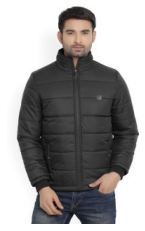

In [13]:
import requests
import cv2

def save_img_from_url(url, filename):
    '''
    Saves the image from url to filename
    No checkers at the moment if the image is missing
    Parameters:
    url - url of the image
    filename - where to save the image
    Return:
    None
    '''    
    r = requests.get(url)    
    with open(filename, 'wb') as f:
        f.write(r.content)
    


# get the URL for first image
row = train_clothing[0]
url = row["content"]
print(url)
print(row['annotation'])
save_img_from_url(url, 'demo.jpg' )
img = cv2.cvtColor(cv2.imread(f'demo.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)
# show the image in (matplotlib)
plt.imshow(img)
plt.axis('off');

(-0.5, 179.5, 311.5, -0.5)

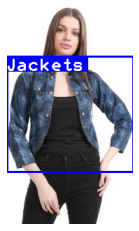

In [14]:
import cv2 
# img = cv2.imread(f'demo.jpg')
# img = img[:,:,::-1]

# use this instead of commented way
img = cv2.cvtColor(cv2.imread(f'demo.jpg'), cv2.COLOR_BGR2RGB)

def img_with_annotation(img, ann):
    '''
    Draws the image with annotation rectangle
    Parameters:
        img - actual image opened with cv2
        ann - array of annotation
    Returns: 
        img - new image in cv2
    '''    
    label = str(ann['label'][0])
    w = ann['imageWidth']
    h = ann['imageHeight']
    points = ann['points']

    # p1 is upper left, p2 is bottom right point 
    p1, p2 = points
    x1, y1 = int(p1['x'] * w),int(p1['y'] * h)
    x2, y2 = int(p2['x'] * w),int(p2['y'] * h)

    # img, point1, point2, color, thickness
    cv2.rectangle(img,(x1, y1),(x2,y2), (0, 0, 255),2)

    # get the label width and height
    ((label_width, label_height), _) = cv2.getTextSize(
        label, 
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75, 
        thickness=2
    )

    # small filled rectanle
    cv2.rectangle(
    img,
    (int(x1), int(y1)),
    (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
    color=(0, 0, 255),
    thickness=cv2.FILLED
    )
    
    # text inside of small filled rectangle
    cv2.putText(
    img,
    label,
    (int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
    cv2.FONT_HERSHEY_PLAIN,
    1.75,
    (255, 255, 255),
    2) 

    return img   
  

# call the function
row = train_clothing[8]
ann = row['annotation']
url = row["content"]

save_img_from_url(url, 'demo.jpg')
img = cv2.cvtColor(cv2.imread(f'demo.jpg'), cv2.COLOR_BGR2RGB)
img = img_with_annotation(img, ann[0])

plt.imshow(img)
plt.axis('off')

# Create dataset in *darknet format*


In [15]:
import requests

def create_dataset(clothing, categories, dataset_type):
  images_path = Path(f"clothing/images/{dataset_type}")
  images_path.mkdir(parents=True, exist_ok=True)
  labels_path = Path(f"clothing/labels/{dataset_type}")
  labels_path.mkdir(parents=True, exist_ok=True)

  for img_id, row in enumerate(tqdm(clothing)):
    image_name = f"{img_id}.jpeg"
    save_img_from_url(row["content"], str(images_path / image_name) )
   
    label_name = f"{img_id}.txt"
    with (labels_path / label_name).open(mode="w") as label_file:
      for a in row['annotation']:
        for label in a['label']:
          category_idx = categories.index(label)
          points = a['points']
          p1, p2 = points
          x1, y1 = p1['x'], p1['y']
          x2, y2 = p2['x'], p2['y']
          bbox_width = x2 - x1
          bbox_height = y2 - y1
          label_file.write(
            f"{category_idx} {x1 + bbox_width / 2} {y1 + bbox_height / 2} {bbox_width} {bbox_height}\n"
          )

In [16]:
create_dataset(train_clothing, categories, 'train')
create_dataset(val_clothing, categories, 'val')

100%|██████████| 51/51 [00:02<00:00, 22.10it/s]


In [17]:
%%capture
!apt install tree 

In [18]:
!tree clothing -L 2

clothing
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories, 0 files


In [19]:
!cat clothing/labels/train/0.txt

0 0.523936170212766 0.5240384615384616 0.9521276595744681 0.6826923076923077


# Fine-tuning YOLO v5 for our dataset

In [20]:
#!rm -R /content/yolov5
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2698 (delta 0), reused 4 (delta 0), pack-reused 2693
Receiving objects: 100% (2698/2698), 5.46 MiB | 31.76 MiB/s, done.
Resolving deltas: 100% (1783/1783), done.


In [21]:
%cd yolov5
!git checkout ec72eea62bf5bb86b0272f2e65e413957533507f

/content/yolov5
Note: checking out 'ec72eea62bf5bb86b0272f2e65e413957533507f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ec72eea Merge remote-tracking branch 'origin/master'


In [23]:
!gdown --id 1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO -O data/clothing.yaml
!gdown --id 1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i -O models/yolov5x.yaml

Downloading...
From: https://drive.google.com/uc?id=1ZycPS5Ft_0vlfgHnLsfvZPhcH6qOAqBO
To: /content/yolov5/data/clothing.yaml
100% 172/172 [00:00<00:00, 138kB/s]
Downloading...
From: https://drive.google.com/uc?id=1czESPsKbOWZF7_PkCcvRfTiUUJfpx12i
To: /content/yolov5/models/yolov5x.yaml
100% 1.58k/1.58k [00:00<00:00, 1.25MB/s]


The content of `data/clothin.yaml` should have the correct class names and number of classes. The order of classes is also important.

```yaml
train: ../clothing/images/train/
val: ../clothing/images/val/

nc: 9

names: ['Jackets', 'Jeans', 'Shirts', 'Shoes', 'Skirts', 'Tops', 'Trousers', 'Tshirts', 'sunglasses']
```

This is the Yolo5 best quality model with number of classes set to 9 `yolov5x.yaml`.
```py
# parameters
nc: 9  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple

# anchors
anchors:
  - [116,90, 156,198, 373,326]  # P5/32
  - [30,61, 62,45, 59,119]  # P4/16
  - [10,13, 16,30, 33,23]  # P3/8

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
  ]

# YOLOv5 head
head:
  [[-1, 3, BottleneckCSP, [1024, False]],  # 9

   [-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],
   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1]],  # 18 (P3/8-small)

   [-2, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],
   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1]],  # 22 (P4/16-medium)

   [-2, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],
   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1]],  # 26 (P5/32-large)

   [[], 1, Detect, [nc, anchors]],  # Detect(P5, P4, P3)
  ]
```

# Edit the `train.py` to work with 9 classes ~ 116th line

In [24]:
pip install -U PyYAML

Requirement already up-to-date: PyYAML in /usr/local/lib/python3.6/dist-packages (5.3.1)


In [ ]:
# ckpt['model'] = {k: v for k, v in ckpt['model'].float().state_dict().items()
# if model.state_dict()[k].shape == v.shape}  # to FP32, filter

ckpt['model'] = {k: v for k, v in ckpt['model'].float().state_dict().items()
if k in model.state_dict() and model.state_dict()[k].shape == v.shape}

# Run the training code


Finetuning `yolov5x.yaml` model that is most accurate by this tutorial:
* https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

`train.py` script parameters to the script:
```
- img 640 - resize the images to 640x640 pixels
- batch 4 - 4 images per batch
- epochs 30 - train for 30 epochs
- data ./data/clothing.yaml - path to dataset config
- cfg ./models/yolov5x.yaml - model config
- weights yolov5x.pt - use pre-trained weights from the YOLOv5x model
- name yolov5x_clothing - name of our model
- cache - cache dataset images for faster training
```

In [25]:
!python train.py --img 640 --batch 4 --epochs 30 \
  --data ./data/clothing.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
  --name yolov5x_clothing --cache

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=4, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='./data/clothing.yaml', device='', epochs=30, evolve=False, img_size=[640], multi_scale=False, name='yolov5x_clothing', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5x.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-11-01 17:02:58.219445: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://local

Yolo 5 already has the script for performance measurements.

# Inferece code

Let's check an image from validation dataset

In [48]:
% cd /content/yolov5
!python detect.py --weights weights/best_yolov5x_clothing.pt \
  --img 640 --conf 0.1 --source /content/clothing/images/val/2.jpeg

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', fourcc='mp4v', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/clothing/images/val/2.jpeg', view_img=False, weights='weights/best_yolov5x_clothing.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

/content/yolov5/utils/utils.py:580: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  i, j = (x[:, 5:] > conf_thres).nonzero().t()
image 1/1 /content/clothing/images/val/2.jpeg: 640x384 1 Skirtss, Done. (0.041s)
Results saved to /content/yolov5/inference/output
Done. (0.101s)


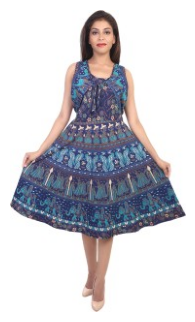

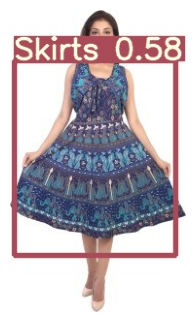

In [63]:
show_image(r'/content/clothing/images/val/2.jpeg', 100)
show_image(r'/content/yolov5/inference/output/2.jpeg', 100)